In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
stream_views_df = pd.read_csv("../data/content_views_raw.csv", header=0)
stream_views_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,TIMESTAMP,MODULEID,MODULENAME
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?


In [29]:
stream_views_df = stream_views_df.drop(["CARDTITLE", "STREAMNAME", "MODULENAME", "MODULEID"], axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,TIMESTAMP
0,1007,2798,561,31-05-2017 01:14
1,1007,2798,561,31-05-2017 01:14
2,1007,2798,561,31-05-2017 01:14
3,1007,2808,561,31-05-2017 01:15
4,1007,2808,561,31-05-2017 01:15


In [30]:
stream_views_df["date"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[0].strip())
stream_views_df["time"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[1].strip())
stream_views_df = stream_views_df.drop("TIMESTAMP", axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time
0,1007,2798,561,31-05-2017,01:14
1,1007,2798,561,31-05-2017,01:14
2,1007,2798,561,31-05-2017,01:14
3,1007,2808,561,31-05-2017,01:15
4,1007,2808,561,31-05-2017,01:15


In [31]:
def concat_time(time_str):
    return int(time_str[:2]) * 100 + int(time_str[3:5])

stream_views_df["time_concatenated"] = stream_views_df["time"].apply(concat_time)

In [32]:
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated
0,1007,2798,561,31-05-2017,01:14,114
1,1007,2798,561,31-05-2017,01:14,114
2,1007,2798,561,31-05-2017,01:14,114
3,1007,2808,561,31-05-2017,01:15,115
4,1007,2808,561,31-05-2017,01:15,115


In [33]:
def label_time(x):
    if x < 800:
        return "Early morning"
    elif x >= 800 and x < 1200:
        return "Morning"
    elif x >= 1200 and x < 1400:
        return "Noon"
    elif x >= 1400 and x < 1800:
        return "Afternoon"
    elif x >= 1800 and x < 2000:
        return "Evening"
    else:
        return "Night"
    
stream_views_df["time_labeled"] = stream_views_df["time_concatenated"].apply(label_time)  
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled
0,1007,2798,561,31-05-2017,01:14,114,Early morning
1,1007,2798,561,31-05-2017,01:14,114,Early morning
2,1007,2798,561,31-05-2017,01:14,114,Early morning
3,1007,2808,561,31-05-2017,01:15,115,Early morning
4,1007,2808,561,31-05-2017,01:15,115,Early morning


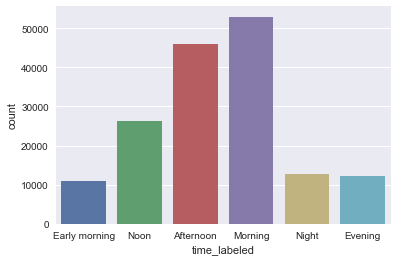

In [8]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="time_labeled", data=stream_views_df)

In [34]:
import datetime

def convert_to_date_of_week(x):
    d = datetime.datetime.strptime(x, "%d-%m-%Y").date()
    days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days_of_week[d.weekday()]

stream_views_df["day_of_week"] = stream_views_df["date"].apply(convert_to_date_of_week)  
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled,day_of_week
0,1007,2798,561,31-05-2017,01:14,114,Early morning,Wednesday
1,1007,2798,561,31-05-2017,01:14,114,Early morning,Wednesday
2,1007,2798,561,31-05-2017,01:14,114,Early morning,Wednesday
3,1007,2808,561,31-05-2017,01:15,115,Early morning,Wednesday
4,1007,2808,561,31-05-2017,01:15,115,Early morning,Wednesday


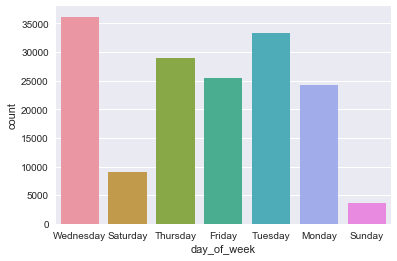

In [35]:
sns.set(style="darkgrid")
ax = sns.countplot(x="day_of_week", data=stream_views_df)

## Num employees watching the streams

In [11]:
stream_views_df["USERID"].nunique()

219

## Unique streams present

In [12]:
stream_views_df["STREAMID"].nunique()

153

## Check the viewing pattern for a specific stream

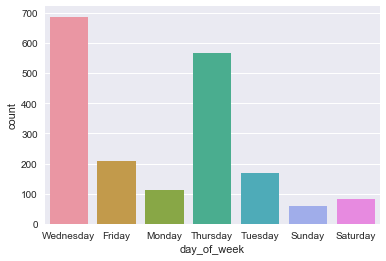

In [13]:
ax = sns.countplot(x="day_of_week", data=stream_views_df[stream_views_df["STREAMID"] == 561])

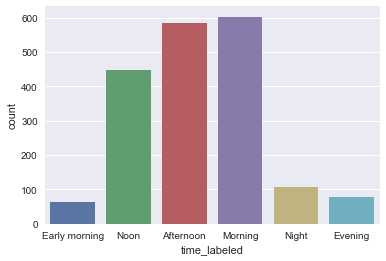

In [14]:
ax = sns.countplot(x="time_labeled", data=stream_views_df[stream_views_df["STREAMID"] == 561])

## Map the views for a user

### This person watches only on Sunday

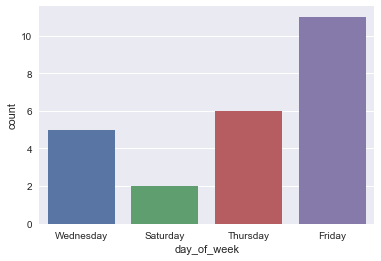

In [15]:
ax = sns.countplot(x="day_of_week", data=stream_views_df[stream_views_df["USERID"] == 1007])

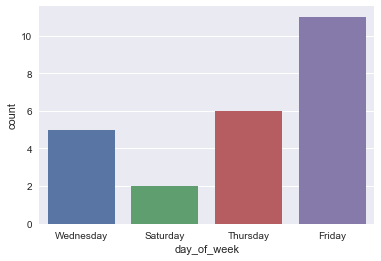

In [16]:
ax = sns.countplot(x="day_of_week", data=stream_views_df[stream_views_df["USERID"] == 1007])

## Map the time of the day the same users are viewing the streams

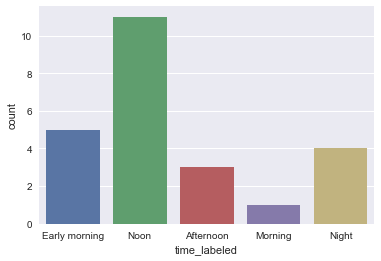

In [17]:
ax = sns.countplot(x="time_labeled", data=stream_views_df[stream_views_df["USERID"] == 1007])

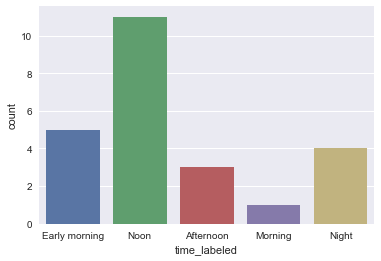

In [18]:
ax = sns.countplot(x="time_labeled", data=stream_views_df[stream_views_df["USERID"] == 1007])

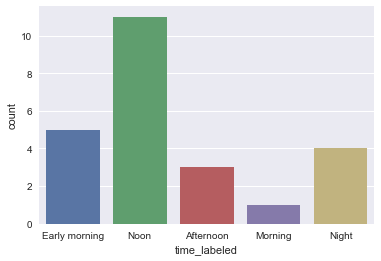

In [19]:
ax = sns.countplot(x="time_labeled", data=stream_views_df[stream_views_df["USERID"] == 1007])

### Combine stream ID and card ID

In [36]:
stream_views_df["streamid_cardid"] = stream_views_df["STREAMID"].map(str) + "_" + stream_views_df["CARDID"].map(str)

### How many times is a given user watching the same card again?

In [37]:
user_views_df = stream_views_df[stream_views_df["USERID"] == 1007][["streamid_cardid", "time_labeled"]]
user_views_df.head()

,streamid_cardid,time_labeled
0,561_2798,Early morning
1,561_2798,Early morning
2,561_2798,Early morning
3,561_2808,Early morning
4,561_2808,Early morning


In [38]:
user_views_aggr_df = user_views_df.groupby("streamid_cardid").agg('count')
user_views_aggr_df.head()

,time_labeled
streamid_cardid,
1089_8714,1
1089_9147,1
1089_9148,1
1089_9149,1
201_1352,1


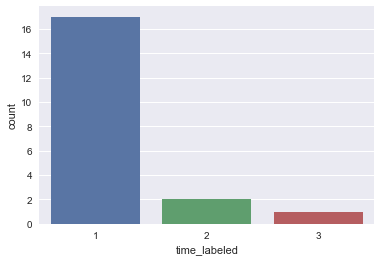

In [39]:
ax = sns.countplot(x="time_labeled", data=user_views_aggr_df)

## Combine the stream views for a user and stream

In [40]:
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled,day_of_week,streamid_cardid
0,1007,2798,561,31-05-2017,01:14,114,Early morning,Wednesday,561_2798
1,1007,2798,561,31-05-2017,01:14,114,Early morning,Wednesday,561_2798
2,1007,2798,561,31-05-2017,01:14,114,Early morning,Wednesday,561_2798
3,1007,2808,561,31-05-2017,01:15,115,Early morning,Wednesday,561_2808
4,1007,2808,561,31-05-2017,01:15,115,Early morning,Wednesday,561_2808


In [54]:
stream_views_df = stream_views_df.drop(["CARDID", "date", "time", "streamid_cardid", "time_labeled"], axis=1)
stream_views_df.head()

ValueError: labels ['CARDID' 'date' 'time' 'streamid_cardid' 'time_labeled'] not contained in axis

In [55]:
stream_views_grouped_time_df = stream_views_df.groupby(["USERID", "STREAMID"])["time_concatenated"].mean().reset_index()
stream_views_grouped_time_df.head()

,USERID,STREAMID,time_concatenated
0,245,163,1414.703596
1,245,167,1633.251938
2,245,171,1419.065041
3,245,172,1486.048193
4,245,173,1482.485030


In [56]:
stream_views_grouped_size_df = stream_views_df.groupby(["USERID", "STREAMID"]).size().reset_index()
stream_views_grouped_size_df.head()

,USERID,STREAMID,0
0,245,163,1029
1,245,167,258
2,245,171,123
3,245,172,83
4,245,173,167


In [57]:
from scipy import stats
stream_views_grouped_day_df = stream_views_df.groupby(["USERID", "STREAMID"])["day_of_week"].agg(lambda x: stats.mode(x)[0][0]).reset_index()
stream_views_grouped_day_df.head()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,USERID,STREAMID,day_of_week
0,245,163,Wednesday
1,245,167,Thursday
2,245,171,Wednesday
3,245,172,Wednesday
4,245,173,Monday


In [58]:
stream_views_grouped_df = stream_views_grouped_time_df.merge(stream_views_grouped_size_df, on = ["USERID", "STREAMID"])
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0
0,245,163,1414.703596,1029
1,245,167,1633.251938,258
2,245,171,1419.065041,123
3,245,172,1486.048193,83
4,245,173,1482.485030,167


In [59]:
stream_views_grouped_df = stream_views_grouped_df.merge(stream_views_grouped_day_df, on = ["USERID", "STREAMID"])
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0,day_of_week
0,245,163,1414.703596,1029,Wednesday
1,245,167,1633.251938,258,Thursday
2,245,171,1419.065041,123,Wednesday
3,245,172,1486.048193,83,Wednesday
4,245,173,1482.485030,167,Monday


In [60]:
stream_views_grouped_df["time_labeled"] = stream_views_grouped_df["time_concatenated"].apply(label_time)  
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0,day_of_week,time_labeled
0,245,163,1414.703596,1029,Wednesday,Afternoon
1,245,167,1633.251938,258,Thursday,Afternoon
2,245,171,1419.065041,123,Wednesday,Afternoon
3,245,172,1486.048193,83,Wednesday,Afternoon
4,245,173,1482.485030,167,Monday,Afternoon


In [61]:
current_column_names = stream_views_grouped_df.columns.values
current_column_names

array(['USERID', 'STREAMID', 'time_concatenated', 0, 'day_of_week',
       'time_labeled'], dtype=object)

In [62]:
stream_views_grouped_df.columns.values[3] = "num_views"

In [ ]:
stream_views_grouped_df.head()